---

##  Portfolio Risk Management

1. Will take all data from the portfolio optimization
2. Perform any risk management operation on the portfolio returns and cumulative returns (max_drawdown limit, crash detection)

---

Idea: Get strategy returns from portfolio optimization -> perform risk management

In [4]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta
import sklearn as sk
import datetime as dt
from skopt.space import Integer, Real, Categorical

# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management'))) 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Strategies', 'Trend_Following')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Strategies', 'Mean_Reversion')))

# Import the modules
from data import Data
from sprtrnd_breakout import Sprtrnd_Breakout
from last_days_low import Last_Days_Low
from portfolio_optimization import Portfolio_Optimization


Skipping category 'layer-1', already processed.
Skipping category 'depin', already processed.
Skipping category 'proof-of-work-pow', already processed.
Skipping category 'proof-of-stake-pos', already processed.
Skipping category 'meme-token', already processed.
Skipping category 'dog-themed-coins', already processed.
Skipping category 'eth-2-0-staking', already processed.
Skipping category 'non-fungible-tokens-nft', already processed.
Skipping category 'governance', already processed.
Skipping category 'artificial-intelligence', already processed.
Skipping category 'infrastructure', already processed.
Skipping category 'layer-2', already processed.
Skipping category 'zero-knowledge-zk', already processed.
Skipping category 'storage', already processed.
Skipping category 'oracle', already processed.
Skipping category 'bitcoin-fork', already processed.
Skipping category 'restaking', already processed.
Skipping category 'rollup', already processed.
Skipping category 'metaverse', already p

In [2]:
# Specify the relative or absolute path to the CSV file
file_path = r"C:\Users\yassi\OneDrive\Documents\GitHub\Portfolio_1\Technical_Portfolio\Data_Management\all_data.csv"

# Read the CSV file
all_data = pd.read_csv(file_path, index_col=['date', 'coin'], parse_dates=['date'])
all_data

close      creturns         high  \
date                coin                                               
2017-08-17 05:00:00 BTCUSDT   4315.320000  1.506209e-03  4328.690000   
                    ETHUSDT    303.100006  4.940270e-03   303.279999   
2017-08-17 06:00:00 BTCUSDT   4324.350000  3.151810e-06  4345.450000   
2017-08-17 07:00:00 BTCUSDT   4349.990000  1.868776e-08  4349.990000   
                    ETHUSDT    307.959991  8.617874e-05   307.959991   
...                                   ...           ...          ...   
2024-12-27 23:00:00 SYSUSDT      0.112200  0.000000e+00     0.112400   
                    TRXUSDT      0.259400  0.000000e+00     0.259600   
                    VETUSDT      0.045760  0.000000e+00     0.045760   
                    WAXPUSDT     0.040910  0.000000e+00     0.040940   
                    XECUSDT      0.000035  0.000000e+00     0.000035   

                              log_return          low         open  \
date                coin                                             
2017-08-17 05:00:00 BTCUSDT    -6.498159  4291.370000  4308.830000   
                    ETHUSDT    -5.310335   300.000000   301.609985   
2017-08-17 06:00:00 BTCUSDT    -6.169374  4309.370000  4330.290000   
2017-08-17 07:00:00 BTCUSDT    -5.127863  4287.410000  4316.620000   
                    ETHUSDT    -4.048752   302.600006   302.679993   
...                                  ...          ...          ...   
2024-12-27 23:00:00 SYSUSDT    -5.632999     0.111100     0.111600   
                    TRXUSDT    -7.860292     0.258600     0.259400   
                    VETUSDT    -5.479996     0.045370     0.045580   
                    WAXPUSDT   -5.915972     0.040590     0.040770   
                    XECUSDT    -5.503282     0.000034     0.000034   

                                    price   returns        volume  \
date                coin                                            
2017-08-17 05:00:00 BTCUSDT   4315.320000  0.001506  2.323492e+01   
                    ETHUSDT    303.100006  0.004940  3.776725e+02   
2017-08-17 06:00:00 BTCUSDT   4324.350000  0.002093  7.229691e+00   
2017-08-17 07:00:00 BTCUSDT   4349.990000  0.005929  4.443249e+00   
                    ETHUSDT    307.959991  0.017444  7.547451e+02   
...                                   ...       ...           ...   
2024-12-27 23:00:00 SYSUSDT      0.112200  0.003578  7.290790e+05   
                    TRXUSDT      0.259400  0.000386  1.499596e+07   
                    VETUSDT      0.045760  0.004169  1.004372e+07   
                    WAXPUSDT     0.040910  0.002696  1.056349e+06   
                    XECUSDT      0.000035  0.004073  1.147830e+09   

                              volume_in_dollars  
date                coin                         
2017-08-17 05:00:00 BTCUSDT        1.002661e+05  
                    ETHUSDT        1.144725e+05  
2017-08-17 06:00:00 BTCUSDT        3.126371e+04  
2017-08-17 07:00:00 BTCUSDT        1.932809e+04  
                    ETHUSDT        2.324313e+05  
...                                         ...  
2024-12-27 23:00:00 SYSUSDT        8.180266e+04  
                    TRXUSDT        3.889953e+06  
                    VETUSDT        4.596008e+05  
                    WAXPUSDT       4.321524e+04  
                    XECUSDT        3.961160e+04  

[956964 rows x 10 columns]

In [3]:
start_time = dt.datetime(2020, 1, 1)
end_time = dt.datetime(2020, 3, 1)
timeframes = ['1w', '1d', '4h', '1h', '30m','15m', '5m', '1m']
index = 3 #It is better to choose the highest frequency for the backtest to be able to downsample
interval = timeframes[index]
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'XRPUSDT']
data = Data(symbols, interval, start_time, end_time).df
data

close  creturns        high  log_return  \
date                coin                                                    
2020-01-01 01:00:00 ADAUSDT     0.03299  1.006406     0.03303    0.006386   
                    BNBUSDT    13.79950  1.007402    13.80000    0.007375   
                    BTCUSDT  7216.27000  1.005469  7230.00000    0.005454   
                    ETHUSDT   130.64000  1.013735   130.65000    0.013641   
                    XRPUSDT     0.19371  1.006390     0.19372    0.006370   
...                                 ...       ...         ...         ...   
2020-02-29 23:00:00 ADAUSDT     0.04710  1.436852     0.04801   -0.017051   
                    BNBUSDT    19.23000  1.403844    19.71550   -0.022028   
                    BTCUSDT  8523.61000  1.187625  8659.96000   -0.012943   
                    ETHUSDT   217.21000  1.685497   223.75000   -0.027920   
                    XRPUSDT     0.22892  1.189318     0.23472   -0.022119   

                                    low        open       price   returns  \
date                coin                                                    
2020-01-01 01:00:00 ADAUSDT     0.03276     0.03277     0.03299  0.006406   
                    BNBUSDT    13.69530    13.69810    13.79950  0.007402   
                    BTCUSDT  7175.71000  7176.47000  7216.27000  0.005469   
                    ETHUSDT   128.78000   128.87000   130.64000  0.013735   
                    XRPUSDT     0.19237     0.19243     0.19371  0.006390   
...                                 ...         ...         ...       ...   
2020-02-29 23:00:00 ADAUSDT     0.04707     0.04793     0.04710 -0.016907   
                    BNBUSDT    19.22960    19.66980    19.23000 -0.021787   
                    BTCUSDT  8523.55000  8634.94000  8523.61000 -0.012860   
                    ETHUSDT   217.00000   223.35000   217.21000 -0.027534   
                    XRPUSDT     0.22870     0.23404     0.22892 -0.021877   

                                   volume  volume_in_dollars  
date                coin                                      
2020-01-01 01:00:00 ADAUSDT  1.560752e+06       5.148920e+04  
                    BNBUSDT  5.379125e+04       7.422924e+05  
                    BTCUSDT  8.830526e+02       6.372346e+06  
                    ETHUSDT  1.134466e+04       1.482066e+06  
                    XRPUSDT  2.339976e+06       4.532768e+05  
...                                   ...                ...  
2020-02-29 23:00:00 ADAUSDT  8.772487e+06       4.131841e+05  
                    BNBUSDT  1.666720e+05       3.205104e+06  
                    BTCUSDT  2.007037e+03       1.710720e+07  
                    ETHUSDT  3.525650e+04       7.658064e+06  
                    XRPUSDT  6.806156e+06       1.558065e+06  

[7165 rows x 10 columns]

---

Call each Strategy

In [4]:
mr_strat_1 = Last_Days_Low(data, objective = 'multiple')
tf_strat_1 = Sprtrnd_Breakout(data, objective = 'multiple')

In [5]:
mr_strat_1.test()

0.9985940661180278
1.0001144711726988
1.288622946680158
1.3073460722392323
1.4287666017137808
1.0612887315816182
0
0
0
1.0684292610821409
{'std_window': 19, 'mean_window': 6, 'ema_window': 85, 'hourly_lookback': 3, 'daily_lookback': 3, '_min_pos': 0.6949941493453458, '_max_pos': 0.727271995856421, 'sl_ind_length': 20, 'sl_ind_mult': 3.066997884824298, 'tp_mult': 5, 'ptp_mult': 1.9611720243493493, 'ptp_exit_percent': 0.8600804638103364}
[19, 6, 85, 3, 3, 0.6949941493453458, 0.727271995856421, 20, 3.066997884824298, 5, 1.9611720243493493, 0.8600804638103364]
Out-of-sample performance: 1.0589178981156397
1.0124721972172892
0.999665509649909
0.9997335036910644
1.1341809296567864
1.0589178981156397
1.0806407355859902
1.2811938210727913
1.0643701821242288
1.0370345267507624
0.9968798310383705
{'std_window': 5, 'mean_window': 10, 'ema_window': 73, 'hourly_lookback': 4, 'daily_lookback': 3, '_min_pos': 0.6947256588850119, '_max_pos': 0.6510770255019446, 'sl_ind_length': 46, 'sl_ind_mult': 4.32

In [6]:
tf_strat_1.test()

1.1401842662328976
1.0007049024869508
1.5193259621884048
1.643414497991856
1.5702707563012241
1.1449014085051252
1.5355982200464602
1.7779991045358492
1.3102038770459095
1.12710874841073
{'std_window': 22, 'mean_window': 22, 'ema_window': 61, 'str_length': 17, 'str_mult': 3, '_min_pos': 0.28719515606534246, '_max_pos': 0.971712095389104, 'sl_ind_length': 43, 'sl_ind_mult': 3.7477828452419297, 'tp_mult': 3, 'ptp_mult': 1.256068322761324, 'ptp_exit_percent': 0.1363902305845882}
[22, 22, 61, 17, 3, 0.28719515606534246, 0.971712095389104, 43, 3.7477828452419297, 3, 1.256068322761324, 0.1363902305845882]
Out-of-sample performance: 1.564044826286511
1.0186769910984994
1.000098214684256
1.530392934140407
0.9796110485991647
1.382606026212551
1.1024823208280017
1.3986461447622471
1.564044826286511
1.1992069124942581
1.0486127064211068
{'std_window': 22, 'mean_window': 22, 'ema_window': 61, 'str_length': 17, 'str_mult': 3, '_min_pos': 0.28719515606534246, '_max_pos': 0.971712095389104, 'sl_ind_l

In [8]:
#Create a dummy results that represents holding cash where the value of the portfolio is constant
cash_df = pd.DataFrame(data = {'strategy': np.zeros(data.shape[0]), 'portfolio_value': np.ones(data.shape[0])}, index = data.index)
cash_df
strategy_map = {'cash_strat': cash_df.strategy,
                'mr_strat_1': mr_strat_1.results.strategy,
                'tf_strat_1': tf_strat_1.results.strategy}

In [9]:
weights = [0.34, 0.34, 0.33]
log_rets = pd.concat(strategy_map, axis = 1).fillna(0)
log_rets

cash_strat  mr_strat_1  tf_strat_1
date                                                           
2020-01-01 01:00:00 ADAUSDT         0.0         0.0         0.0
                    BNBUSDT         0.0         0.0         0.0
                    BTCUSDT         0.0         0.0         0.0
                    ETHUSDT         0.0         0.0         0.0
                    XRPUSDT         0.0         0.0         0.0
...                                 ...         ...         ...
2020-02-29 23:00:00 ADAUSDT         0.0         0.0         0.0
                    BNBUSDT         0.0         0.0         0.0
                    BTCUSDT         0.0         0.0         0.0
                    ETHUSDT         0.0         0.0         0.0
                    XRPUSDT         0.0         0.0         0.0

[7165 rows x 3 columns]

---

In [17]:
import pickle
# Save to a file
with open("variables.pkl", "wb") as file:
    pickle.dump(log_rets, file)

In [2]:
import pickle
with open("variables.pkl", "rb") as file:
    log_rets = pickle.load(file)
    
log_rets

cash_strat  mr_strat_1  tf_strat_1
date                                                           
2020-01-01 01:00:00 ADAUSDT         0.0         0.0         0.0
                    BNBUSDT         0.0         0.0         0.0
                    BTCUSDT         0.0         0.0         0.0
                    ETHUSDT         0.0         0.0         0.0
                    XRPUSDT         0.0         0.0         0.0
...                                 ...         ...         ...
2020-02-29 23:00:00 ADAUSDT         0.0         0.0         0.0
                    BNBUSDT         0.0         0.0         0.0
                    BTCUSDT         0.0         0.0         0.0
                    ETHUSDT         0.0         0.0         0.0
                    XRPUSDT         0.0         0.0         0.0

[7165 rows x 3 columns]

In [5]:
wfo = Portfolio_Optimization(strategies = log_rets, train_size = 1000, test_size = 1000, step_size = 1000, objective = 'multiple')

In [6]:
all_performance, all_results = wfo.walk_forward_optimization()

Out-of-sample performance: 0
Out-of-sample performance: 1.0026573977322712
Out-of-sample performance: 1.5516419359017726
Out-of-sample performance: 1.0647326063147773
Out-of-sample performance: 0.8827062737667963
Out-of-sample performance: 0


In [7]:
creturns = all_results.cumsum().apply(np.exp)

<Axes: >

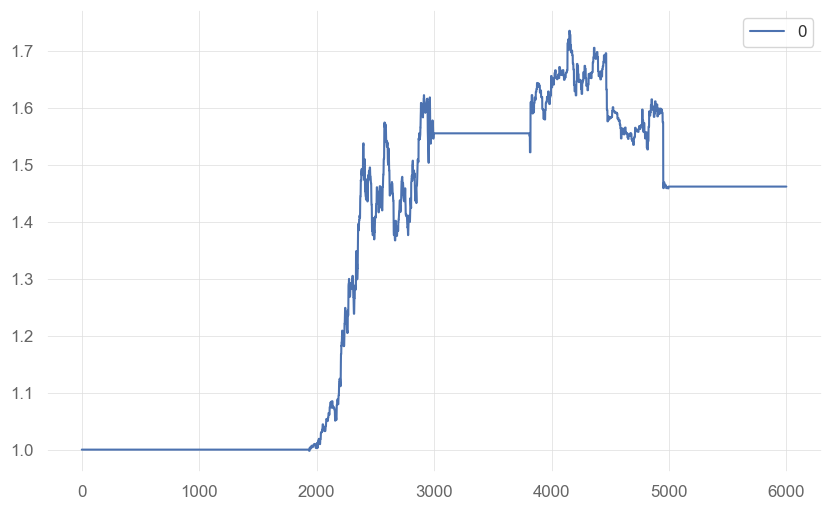

In [8]:
creturns.plot()

---

Max Drawdown Limit

Get the current drawdown for the returns -> when drawdown > threshold drawdown -> make strategy return == 0, else leave it as is 

In [36]:
# Step 2: Calculate cumulative maximum
cumulative_max = creturns.cummax()

# Step 3: Calculate drawdown
drawdown = (creturns - cumulative_max) / cumulative_max

<Axes: >

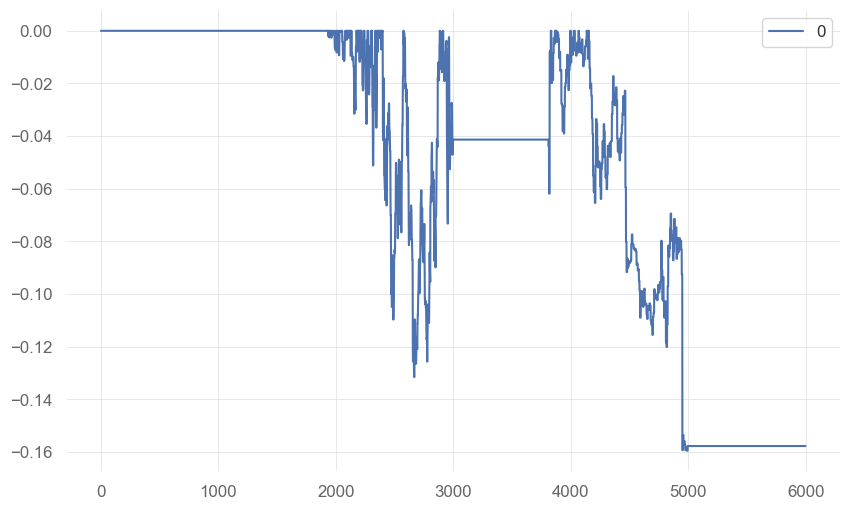

In [37]:
drawdown.plot()

In [71]:
all_results.index.equals(drawdown.index)

True

In [73]:
drawdown

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
5995,-0.157683
5996,-0.157683
5997,-0.157683
5998,-0.157683


In [85]:
threshold = -0.15
returns = all_results[0]
all_results['drawdown_threshold'] = np.where(drawdown[0] < threshold, 0, returns)

In [86]:
all_results['drawdown_threshold'].value_counts()

drawdown_threshold
 0.000000e+00    4935
-8.143158e-20       1
-3.838284e-19       1
 1.655716e-04       1
-8.140602e-20       1
                 ... 
-2.872872e-03       1
-1.197343e-02       1
-1.079032e-02       1
-7.312095e-03       1
-1.754980e-19       1
Name: count, Length: 1066, dtype: int64

<Axes: >

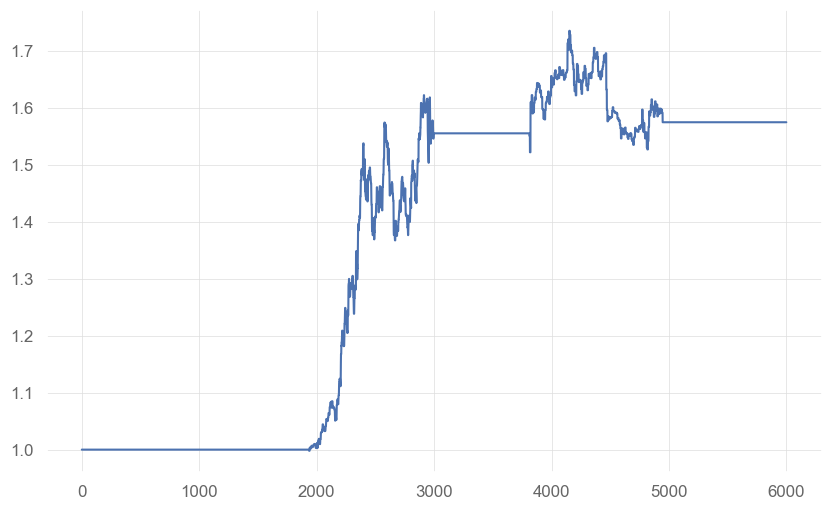

In [88]:
all_results['drawdown_threshold'].cumsum().apply(np.exp).plot() #Note that we haven't taken into account the transaction costs,
    #so this might seem really good, bit transaction costs will eat into the profits

<Axes: >

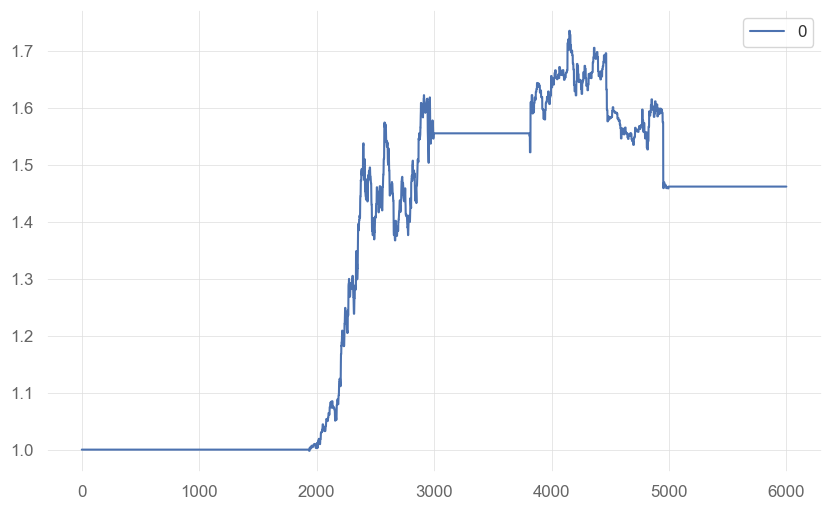

In [89]:
creturns.plot()

---

Trying to apply fees

In [122]:
# Step 5: Apply fee when returns go from 0 to a return or return to 0
maker = 0.25
taker = 0.40
drawdown_limit = all_results['drawdown_threshold']
transitions = (np.sign(drawdown_limit) - np.sign(drawdown_limit.shift(1))).fillna(0)
transitions = transitions.apply(lambda x: 1 if x == 1 else (-1 if x == -1 else 0))
transitions[0] = 0  # No fee for the first element

In [123]:
transitions.value_counts()

drawdown_threshold
 0    4746
 1     629
-1     625
Name: count, dtype: int64

In [124]:
all_results['trade_costs'] = np.where(
            transitions > 0,
            transitions * (maker / 100),
            transitions * (taker / 100) * (-1)
        )
drawdown_limit_2 = drawdown_limit - all_results['trade_costs']

In [125]:
all_results['trade_costs'].value_counts()

trade_costs
-0.0000    4746
 0.0025     629
 0.0040     625
Name: count, dtype: int64

<Axes: >

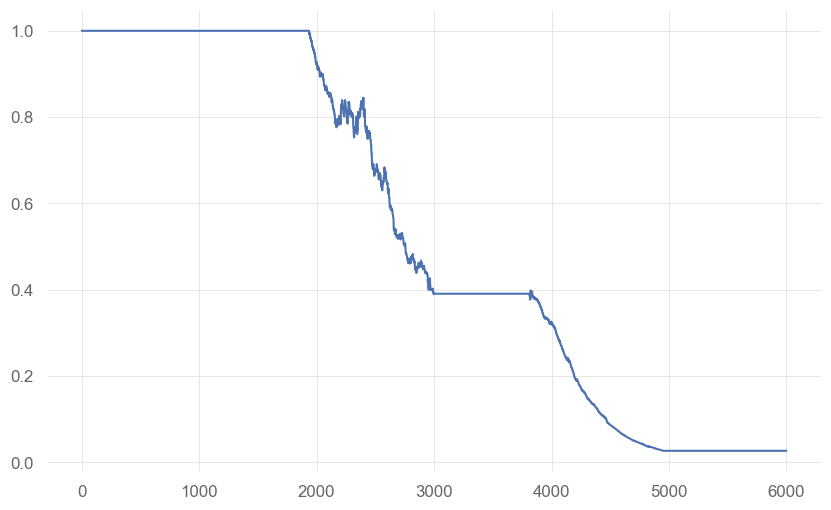

In [126]:
pd.Series(drawdown_limit_2).cumsum().apply(np.exp).plot()

---

Putting all Together

In [127]:
def drawdown_limit(threshold, returns, maker =0.25, taker = 0.40):
    # Step 1: Calculate the cumulative returns
    creturns = returns.cumsum().apply(np.exp)
    
    # Step 2: Calculate cumulative maximum
    cumulative_max = creturns.cummax()

    # Step 3: Calculate drawdown
    drawdown = (creturns - cumulative_max) / cumulative_max

    # Step 4: Calculate the drawdown limit
    drawdown_limit = np.where(drawdown < threshold, 0, returns)
    
    return pd.Series(drawdown_limit)

<Axes: >

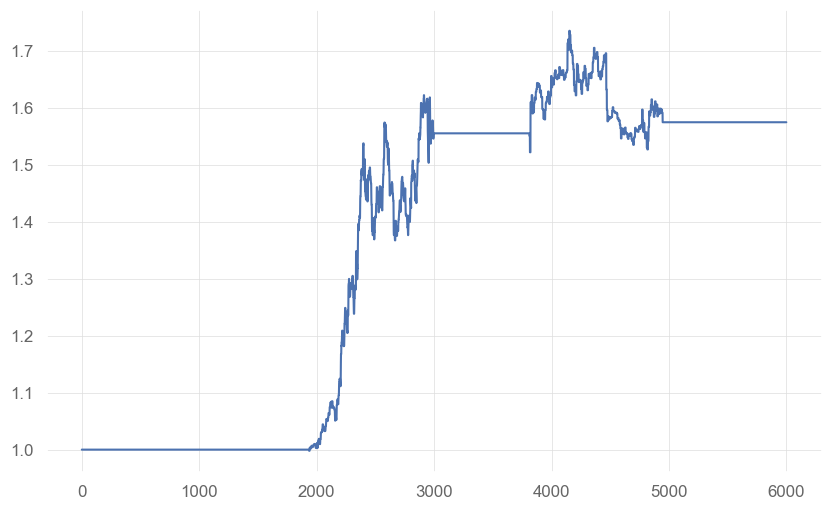

In [128]:
drawdown_limit(-0.15, all_results[0]).cumsum().apply(np.exp).plot()